In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
features_3_sec_path = '../Data/features_3_sec.csv'
features_30_sec_path = '../Data/features_30_sec.csv'

df_3_sec = pd.read_csv(features_3_sec_path)
df_30_sec = pd.read_csv(features_30_sec_path)


print("3-Second Features:")
display(df_3_sec.head())

print("\n30-Second Features:")
display(df_30_sec.head())

3-Second Features:


,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues



30-Second Features:


,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


In [5]:
def preprocess_and_split(df, test_size=0.2, random_state=42):
    X = df.drop(columns=['filename', 'label'])
    y = df['label']
    return train_test_split(X, y, test_size=test_size, random_state=random_state, stratify=y)


X_train_3, X_test_3, y_train_3, y_test_3 = preprocess_and_split(df_3_sec)
X_train_30, X_test_30, y_train_30, y_test_30 = preprocess_and_split(df_30_sec)

print(f"3-Second Features Training Set: {X_train_3.shape}, Testing Set: {X_test_3.shape}")
print(f"30-Second Features Training Set: {X_train_30.shape}, Testing Set: {X_test_30.shape}")

3-Second Features Training Set: (7992, 58), Testing Set: (1998, 58)
30-Second Features Training Set: (800, 58), Testing Set: (200, 58)


In [6]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

def train_random_forest(X_train, y_train, param_grid):
    rf = RandomForestClassifier(random_state=42, n_jobs=-1)
    grid_search = GridSearchCV(estimator=rf,
                               param_grid=param_grid,
                               cv=5,
                               n_jobs=-1,
                               verbose=1,
                               scoring='accuracy')
    grid_search.fit(X_train, y_train)
    return grid_search

print("Training on 3-Second Features...")
grid_search_3 = train_random_forest(X_train_3, y_train_3, param_grid)

print("\nTraining on 30-Second Features...")
grid_search_30 = train_random_forest(X_train_30, y_train_30, param_grid)

Training on 3-Second Features...
Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   2.8s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   4.0s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   4.0s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   4.1s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   4.3s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   4.4s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   4.4s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_sampl

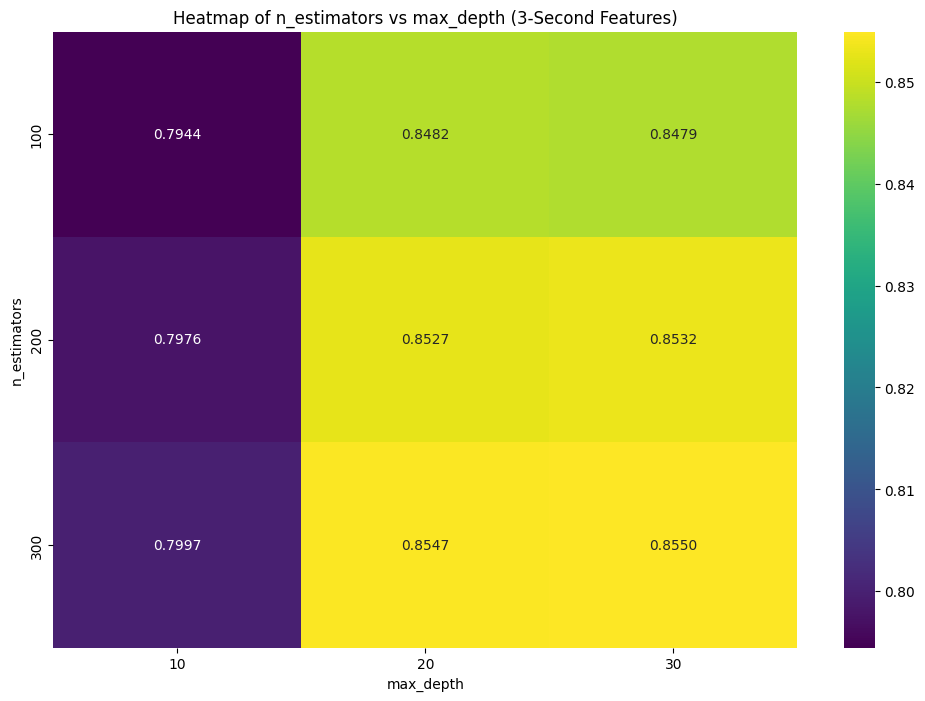

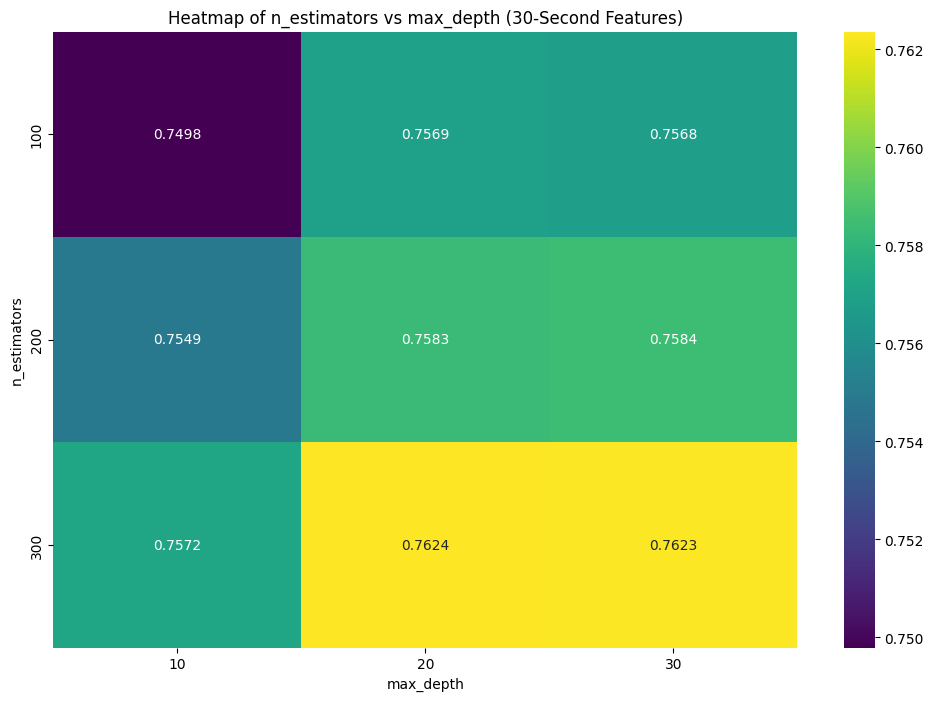

In [10]:
def plot_heatmap(grid_search, param1, param2, feature_set_name):
    results = pd.DataFrame(grid_search.cv_results_)
    pivot_table = results.pivot_table(values='mean_test_score', index=f'param_{param1}', columns=f'param_{param2}')
    plt.figure(figsize=(12, 8))
    sns.heatmap(pivot_table, annot=True, fmt=".4f", cmap='viridis')
    plt.title(f'Heatmap of {param1} vs {param2} ({feature_set_name} Features)')
    plt.xlabel(param2)
    plt.ylabel(param1)
    plt.show()

plot_heatmap(grid_search_3, 'n_estimators', 'max_depth', '3-Second')
plot_heatmap(grid_search_30, 'n_estimators', 'max_depth', '30-Second')


In [12]:
print("Best Hyperparameters for 3-Second Features:")
print(grid_search_3.best_params_)
print(f"Best Cross-Validated Accuracy: {grid_search_3.best_score_:.4f}")

print("\nBest Hyperparameters for 30-Second Features:")
print(grid_search_30.best_params_)
print(f"Best Cross-Validated Accuracy: {grid_search_30.best_score_:.4f}")

Best Hyperparameters for 3-Second Features:
{'bootstrap': False, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best Cross-Validated Accuracy: 0.8848

Best Hyperparameters for 30-Second Features:
{'bootstrap': False, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best Cross-Validated Accuracy: 0.7825


In [8]:
def evaluate_model(grid_search, X_test, y_test, feature_set_name):
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\nAccuracy for {feature_set_name} Features: {accuracy:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    return accuracy, best_model


accuracy_3, best_model_3 = evaluate_model(grid_search_3, X_test_3, y_test_3, "3-Second")
accuracy_30, best_model_30 = evaluate_model(grid_search_30, X_test_30, y_test_30, "30-Second")

if accuracy_3 > accuracy_30:
    print("\n3-Second Feature Model performed better.")
    best_model = best_model_3
    best_feature_set = 'features_3_sec'
else:
    print("\n30-Second Feature Model performed better.")
    best_model = best_model_30
    best_feature_set = 'features_30_sec'




Accuracy for 3-Second Features: 0.8884
Classification Report:
              precision    recall  f1-score   support

       blues       0.88      0.89      0.88       200
   classical       0.91      0.97      0.94       199
     country       0.84      0.87      0.86       199
       disco       0.86      0.88      0.87       200
      hiphop       0.93      0.90      0.92       200
        jazz       0.86      0.91      0.88       200
       metal       0.89      0.95      0.92       200
         pop       0.96      0.83      0.89       200
      reggae       0.87      0.91      0.89       200
        rock       0.90      0.78      0.83       200

    accuracy                           0.89      1998
   macro avg       0.89      0.89      0.89      1998
weighted avg       0.89      0.89      0.89      1998

Confusion Matrix:
[[177   1   4   2   0   4   5   0   6   1]
 [  0 193   1   0   0   4   0   0   1   0]
 [  9   1 174   2   0   6   0   2   4   1]
 [  0   0   5 175   2   2   5  

In [15]:
joblib.dump(best_model, '../Models/RF.joblib')

['../Models/RF.joblib']